<a href="https://colab.research.google.com/github/ClaFlorez/Machine_Learning_Simplifie/blob/main/8_5_Creation_du_dataset_client_realiste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJET COMPLET: Segmentation de clientèle e-commerce
Simulation de 5 segments clients cachés:
  • Jeunes Urbains Tech: 1000 clients, âge moyen 28 ans
  • Familles Actives: 1500 clients, âge moyen 38 ans
  • Seniors Aisés: 800 clients, âge moyen 62 ans
  • Étudiants Économes: 600 clients, âge moyen 22 ans
  • Professionnels Premium: 1100 clients, âge moyen 45 ans

Génération du segment 'Jeunes Urbains Tech'...

Génération du segment 'Familles Actives'...

Génération du segment 'Seniors Aisés'...

Génération du segment 'Étudiants Économes'...

Génération du segment 'Professionnels Premium'...

Dataset de clients créé avec succès:
  Nombre total de clients: 5,000
  Période simulée: 2 ans d'historique
  Variables collectées: 14

Statistiques descriptives globales:
           age  revenu_annuel  frequence_achat_an  panier_moyen  \
count  5000.00        5000.00             5000.00       5000.00   
mean     39.48       55096.73               22.34        156.02   
std      14.29       26073.8

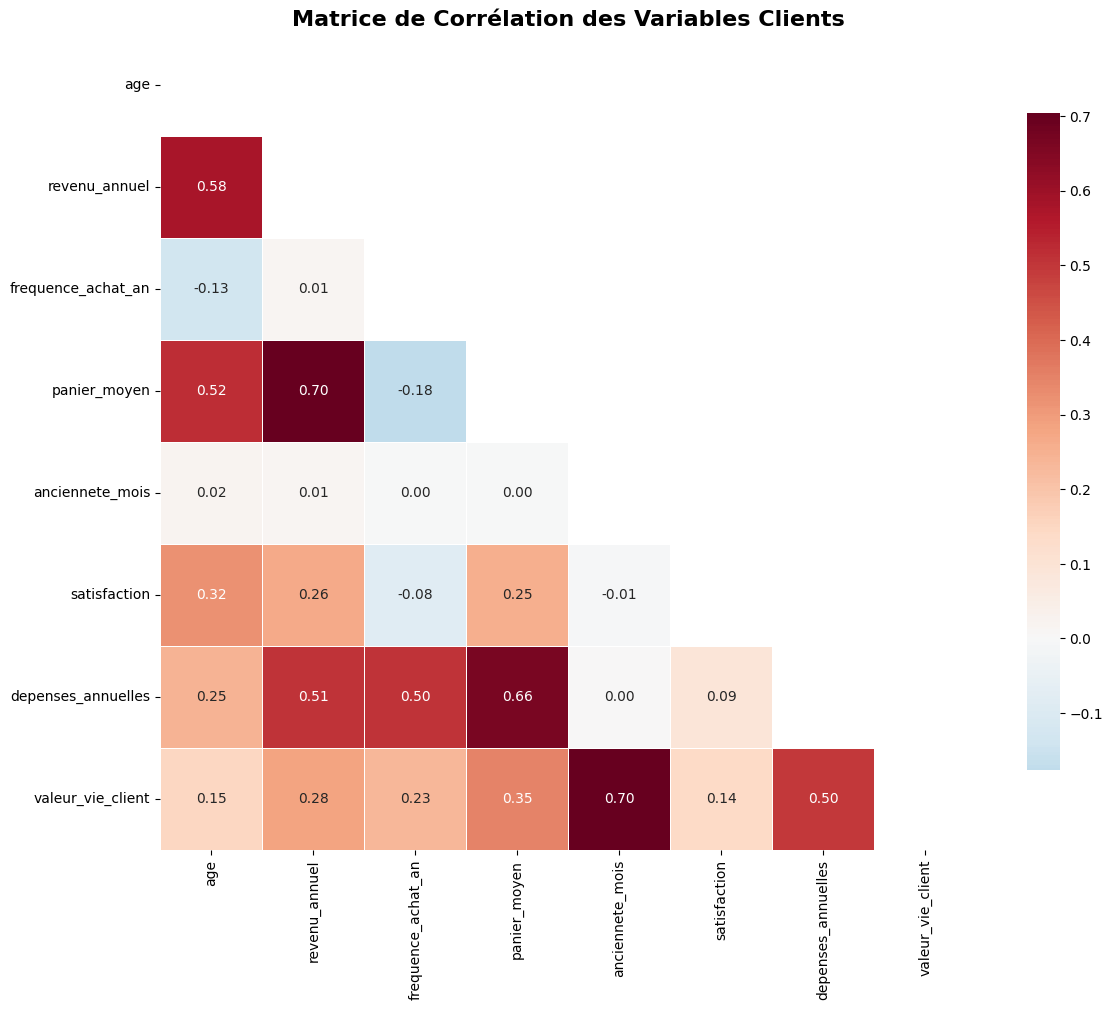


Insights des corrélations:
✅ Corrélations logiques détectées (ex: revenu ↔ panier moyen)
✅ Pas de corrélation parfaite (pas de redondance totale)
✅ Structure suffisamment riche pour le clustering


In [1]:
#Création du dataset client réaliste
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Créer un dataset de clients e-commerce ultra-réaliste
print("PROJET COMPLET: Segmentation de clientèle e-commerce")
print("=" * 80)

np.random.seed(42)
n_clients = 5000

# Simuler 5 segments naturels mais cachés dans les données
segments_caches = [
    {
        'nom': 'Jeunes Urbains Tech',
        'taille': 1000,
        'age_moy': 28, 'age_std': 5,
        'revenu_moy': 35000, 'revenu_std': 8000,
        'freq_achat': 24, 'freq_std': 6,
        'panier_moy': 85, 'panier_std': 25,
        'mobile_pct': 0.9, 'satisfaction_moy': 4.1
    },
    {
        'nom': 'Familles Actives',
        'taille': 1500,
        'age_moy': 38, 'age_std': 8,
        'revenu_moy': 55000, 'revenu_std': 12000,
        'freq_achat': 36, 'freq_std': 10,
        'panier_moy': 120, 'panier_std': 35,
        'mobile_pct': 0.7, 'satisfaction_moy': 3.9
    },
    {
        'nom': 'Seniors Aisés',
        'taille': 800,
        'age_moy': 62, 'age_std': 10,
        'revenu_moy': 70000, 'revenu_std': 15000,
        'freq_achat': 12, 'freq_std': 4,
        'panier_moy': 200, 'panier_std': 60,
        'mobile_pct': 0.3, 'satisfaction_moy': 4.3
    },
    {
        'nom': 'Étudiants Économes',
        'taille': 600,
        'age_moy': 22, 'age_std': 3,
        'revenu_moy': 15000, 'revenu_std': 5000,
        'freq_achat': 8, 'freq_std': 3,
        'panier_moy': 45, 'panier_std': 15,
        'mobile_pct': 0.95, 'satisfaction_moy': 3.6
    },
    {
        'nom': 'Professionnels Premium',
        'taille': 1100,
        'age_moy': 45, 'age_std': 8,
        'revenu_moy': 85000, 'revenu_std': 20000,
        'freq_achat': 18, 'freq_std': 5,
        'panier_moy': 300, 'panier_std': 80,
        'mobile_pct': 0.6, 'satisfaction_moy': 4.2
    }
]

print(f"Simulation de {len(segments_caches)} segments clients cachés:")
for segment in segments_caches:
    print(f"  • {segment['nom']}: {segment['taille']} clients, âge moyen {segment['age_moy']} ans")

clients_data = []

for segment in segments_caches:
    print(f"\nGénération du segment '{segment['nom']}'...")

    for i in range(segment['taille']):
        # Caractéristiques démographiques
        age = max(18, min(80, np.random.normal(segment['age_moy'], segment['age_std'])))
        revenu = max(10000, np.random.normal(segment['revenu_moy'], segment['revenu_std']))

        # Comportement d'achat
        freq_achat = max(1, np.random.normal(segment['freq_achat'], segment['freq_std']))
        panier_moyen = max(20, np.random.normal(segment['panier_moy'], segment['panier_std']))

        # Variables dérivées réalistes
        anciennete_mois = np.random.exponential(18)  # Distribution réaliste d'ancienneté
        nb_retours = max(0, np.random.poisson(freq_achat * 0.08))  # 8% de taux de retour
        utilise_mobile = np.random.choice([0, 1], p=[1-segment['mobile_pct'], segment['mobile_pct']])

        # Satisfaction (corrélée avec autres facteurs)
        satisfaction_base = segment['satisfaction_moy']
        # Ajuster selon l'âge et le service
        if age > 60:
            satisfaction_base += 0.2  # Seniors plus indulgents
        if panier_moyen > segment['panier_moy'] * 1.5:
            satisfaction_base -= 0.3  # Gros achats = plus exigeants

        satisfaction = np.clip(satisfaction_base + np.random.normal(0, 0.5), 1, 5)

        # Dépenses totales annuelles avec variabilité
        depenses_base = freq_achat * panier_moyen
        variation_saisonniere = np.random.uniform(0.8, 1.3)  # Variation ±30%
        depenses_annuelles = depenses_base * variation_saisonniere

        # Métriques avancées
        taux_retour = nb_retours / max(1, freq_achat)
        valeur_vie_client = depenses_annuelles * (anciennete_mois / 12) * (satisfaction / 5)

        # Préférences produits (simulées)
        pref_electronique = np.random.beta(2, 5) if segment['nom'] == 'Jeunes Urbains Tech' else np.random.beta(1, 3)
        pref_maison = np.random.beta(3, 2) if segment['nom'] == 'Familles Actives' else np.random.beta(1, 4)
        pref_luxe = np.random.beta(4, 2) if 'Premium' in segment['nom'] or 'Aisés' in segment['nom'] else np.random.beta(1, 5)

        clients_data.append({
            'client_id': f'C{len(clients_data)+1:05d}',
            'age': age,
            'revenu_annuel': revenu,
            'frequence_achat_an': freq_achat,
            'panier_moyen': panier_moyen,
            'anciennete_mois': anciennete_mois,
            'nb_retours': nb_retours,
            'taux_retour': taux_retour,
            'utilise_mobile': utilise_mobile,
            'satisfaction': satisfaction,
            'depenses_annuelles': depenses_annuelles,
            'valeur_vie_client': valeur_vie_client,
            'pref_electronique': pref_electronique,
            'pref_maison': pref_maison,
            'pref_luxe': pref_luxe,
            'segment_reel': segment['nom']  # Pour validation (normalement inconnue)
        })

df_clients = pd.DataFrame(clients_data)

print(f"\nDataset de clients créé avec succès:")
print(f"  Nombre total de clients: {len(df_clients):,}")
print(f"  Période simulée: 2 ans d'historique")
print(f"  Variables collectées: {len(df_clients.columns) - 2}")  # -2 pour client_id et segment_reel

# Statistiques descriptives
print(f"\nStatistiques descriptives globales:")
print("=" * 50)
stats_desc = df_clients.describe()
print(stats_desc.round(2))

# Exploration des corrélations
print(f"\nAnalyse des corrélations entre variables:")
print("=" * 50)

features_numeriques = ['age', 'revenu_annuel', 'frequence_achat_an', 'panier_moyen',
                      'anciennete_mois', 'satisfaction', 'depenses_annuelles', 'valeur_vie_client']

correlation_matrix = df_clients[features_numeriques].corr()

# Afficher les corrélations les plus fortes
print("Corrélations significatives (|r| > 0.3):")
for i in range(len(features_numeriques)):
    for j in range(i+1, len(features_numeriques)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.3:
            var1, var2 = features_numeriques[i], features_numeriques[j]
            print(f"  • {var1} ↔ {var2}: {corr:+.3f}")

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
           square=True, linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation des Variables Clients', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nInsights des corrélations:")
print("✅ Corrélations logiques détectées (ex: revenu ↔ panier moyen)")
print("✅ Pas de corrélation parfaite (pas de redondance totale)")
print("✅ Structure suffisamment riche pour le clustering")


ÉTAPE 2: Préparation des données pour clustering
Features sélectionnées pour le clustering:
  • age: 39.48 ± 14.29
  • revenu_annuel: 55096.73 ± 26073.80
  • frequence_achat_an: 22.34 ± 12.03
  • panier_moyen: 156.02 ± 101.30
  • anciennete_mois: 18.11 ± 18.05
  • satisfaction: 4.03 ± 0.55
  • utilise_mobile: 0.68 ± 0.47
  • taux_retour: 0.08 ± 0.07
  • pref_electronique: 0.26 ± 0.18
  • pref_maison: 0.32 ± 0.25
  • pref_luxe: 0.36 ± 0.29

Détection des valeurs aberrantes:
  ✅ age: 38 outliers (0.8%)
  ✅ revenu_annuel: 16 outliers (0.3%)
  ✅ frequence_achat_an: 29 outliers (0.6%)
  ✅ panier_moyen: 65 outliers (1.3%)
  ✅ anciennete_mois: 237 outliers (4.7%)
  ✅ satisfaction: 14 outliers (0.3%)
  ✅ utilise_mobile: 0 outliers (0.0%)
  ✅ taux_retour: 118 outliers (2.4%)
  ✅ pref_electronique: 39 outliers (0.8%)
  ✅ pref_maison: 0 outliers (0.0%)
  ✅ pref_luxe: 0 outliers (0.0%)

Total outliers détectées: 556
⚠️ Beaucoup d'outliers - Utilisation de RobustScaler recommandée
Méthode de stand

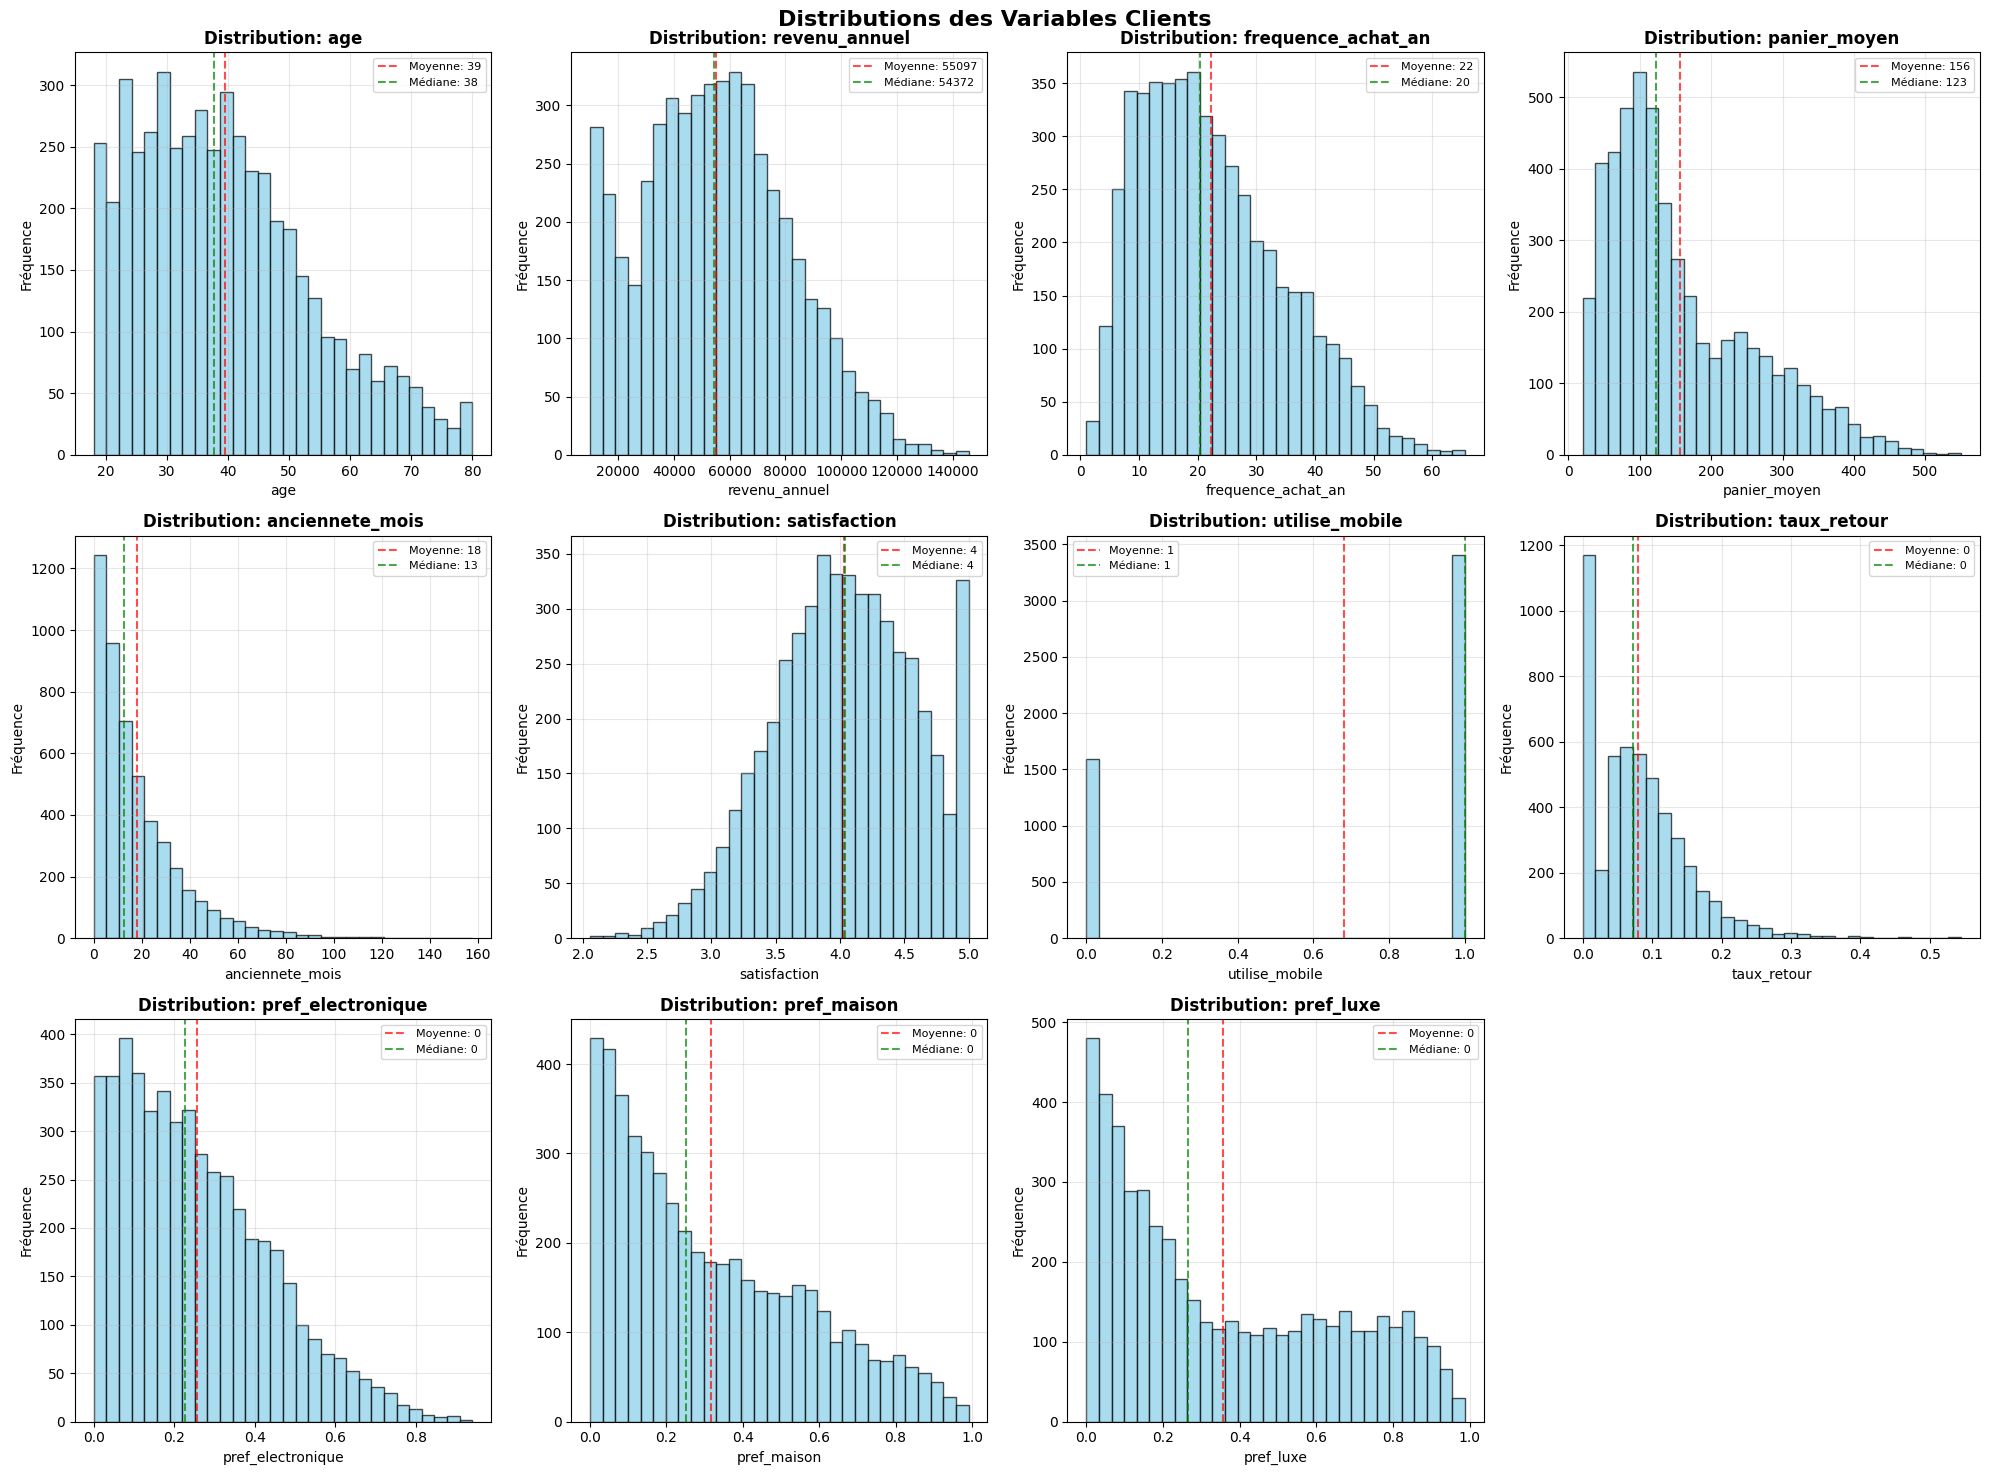

In [2]:
# Étape 2: Préparation des données pour clustering
print("\nÉTAPE 2: Préparation des données pour clustering")
print("=" * 60)

# Sélectionner les features pertinentes pour le clustering
features_clustering = [
    'age', 'revenu_annuel', 'frequence_achat_an', 'panier_moyen',
    'anciennete_mois', 'satisfaction', 'utilise_mobile', 'taux_retour',
    'pref_electronique', 'pref_maison', 'pref_luxe'
]

X = df_clients[features_clustering].copy()

print(f"Features sélectionnées pour le clustering:")
for feature in features_clustering:
    print(f"  • {feature}: {X[feature].mean():.2f} ± {X[feature].std():.2f}")

# Détection et traitement des valeurs aberrantes
print(f"\nDétection des valeurs aberrantes:")
print("=" * 40)

outliers_detected = {}
for feature in features_clustering:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((X[feature] < lower_bound) | (X[feature] > upper_bound)).sum()
    outliers_pct = outliers / len(X) * 100

    outliers_detected[feature] = outliers

    if outliers_pct > 5:
        print(f"  ⚠️ {feature}: {outliers} outliers ({outliers_pct:.1f}%)")
    else:
        print(f"  ✅ {feature}: {outliers} outliers ({outliers_pct:.1f}%)")

# Décision sur le traitement des outliers
total_outliers = sum(outliers_detected.values())
print(f"\nTotal outliers détectées: {total_outliers}")

if total_outliers / len(X) > 0.1:
    print("⚠️ Beaucoup d'outliers - Utilisation de RobustScaler recommandée")
    scaler = RobustScaler()  # Moins sensible aux outliers
    scaling_method = "RobustScaler (résistant aux outliers)"
else:
    print("✅ Peu d'outliers - StandardScaler suffisant")
    scaler = StandardScaler()
    scaling_method = "StandardScaler (standard)"

print(f"Méthode de standardisation choisie: {scaling_method}")

# Standardisation
X_scaled = scaler.fit_transform(X)

print(f"\nVérification de la standardisation:")
print("Moyennes après standardisation (doivent être ~0):")
for i, feature in enumerate(features_clustering):
    mean_scaled = X_scaled[:, i].mean()
    std_scaled = X_scaled[:, i].std()
    print(f"  {feature}: moyenne={mean_scaled:.3f}, écart-type={std_scaled:.3f}")

# Analyse des distributions après standardisation
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(features_clustering):
    if i < len(axes):
        axes[i].hist(X[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution: {feature}', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Fréquence')
        axes[i].grid(True, alpha=0.3)

        # Ajouter statistiques sur le graphique
        mean_val = X[feature].mean()
        median_val = X[feature].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Moyenne: {mean_val:.0f}')
        axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Médiane: {median_val:.0f}')
        axes[i].legend(fontsize=8)

# Masquer les axes non utilisés
for i in range(len(features_clustering), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Distributions des Variables Clients', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


ÉTAPE 3: Comparaison des algorithmes de clustering
Recherche du nombre optimal de clusters (K-Means):
------------------------------------------------------------
K=2: Silhouette=0.247, Calinski=1603, Davies-Bouldin=1.642
K=3: Silhouette=0.199, Calinski=1260, Davies-Bouldin=1.776
K=4: Silhouette=0.202, Calinski=1084, Davies-Bouldin=1.593
K=5: Silhouette=0.190, Calinski=934, Davies-Bouldin=1.598
K=6: Silhouette=0.158, Calinski=845, Davies-Bouldin=1.908
K=7: Silhouette=0.138, Calinski=772, Davies-Bouldin=1.887
K=8: Silhouette=0.141, Calinski=720, Davies-Bouldin=1.857
K=9: Silhouette=0.141, Calinski=681, Davies-Bouldin=1.816
K=10: Silhouette=0.137, Calinski=648, Davies-Bouldin=1.869


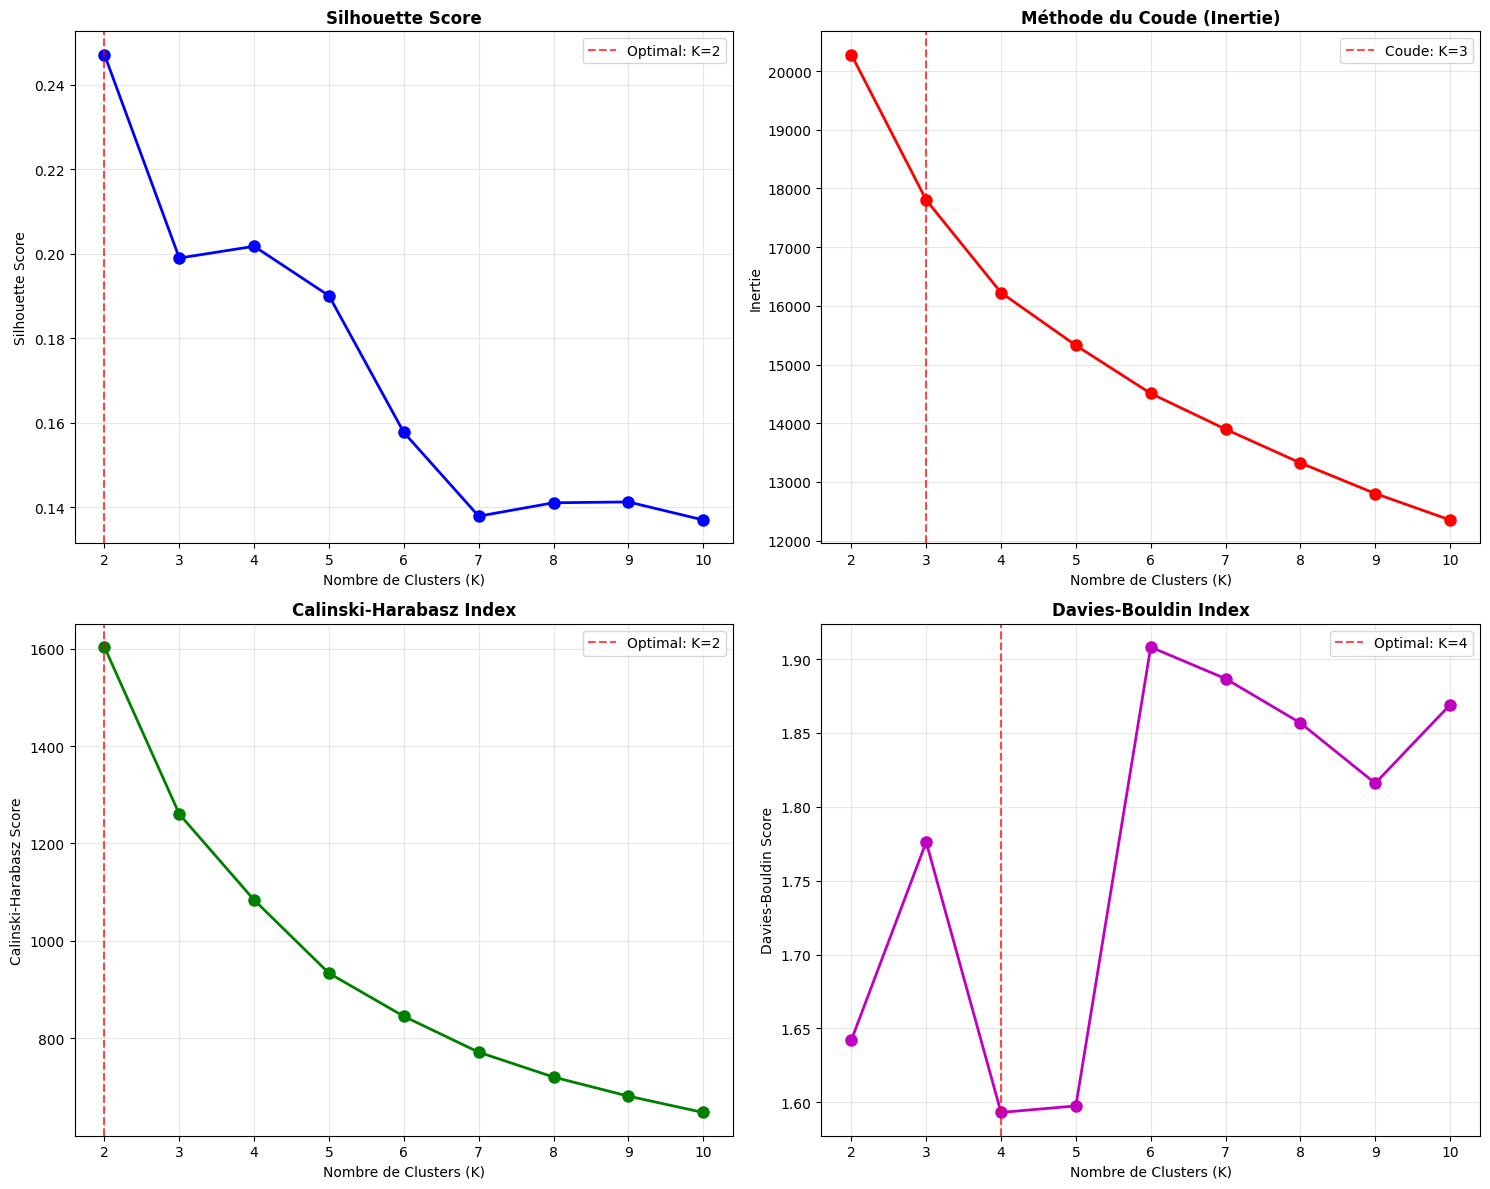


Recommandations par métrique:
  • Silhouette Score: K=2
  • Calinski-Harabasz: K=2
  • Davies-Bouldin: K=4
  • Méthode du coude: K=3

Choix du nombre de clusters:
✅ MAJORITÉ: K=2 (2 votes)

Comparaison des algorithmes avec K=2:
Algorithme      Silhouette   N_Clusters   N_Noise    Commentaire
--------------------------------------------------------------------------------
K-Means         0.247        2            0          Séparation faible
Hiérarchique    0.220        2            0          Séparation faible
DBSCAN          -1.000       1            5          eps=2.425

Meilleur algorithme: K-Means
  Silhouette Score: 0.247
  Nombre de clusters: 2


In [4]:
# Étape 3: Comparaison exhaustive des méthodes
print("\nÉTAPE 3: Comparaison des algorithmes de clustering")
print("=" * 70)

from sklearn.metrics import davies_bouldin_score # Import davies_bouldin_score

# Recherche du nombre optimal de clusters pour K-Means
print("Recherche du nombre optimal de clusters (K-Means):")
print("-" * 60)

k_range = range(2, 11)
kmeans_metrics = {
    'silhouette': [],
    'calinski': [],
    'inertia': [],
    'davies_bouldin': []
}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    # Calculer toutes les métriques
    sil_score = silhouette_score(X_scaled, clusters)
    cal_score = calinski_harabasz_score(X_scaled, clusters)
    db_score = davies_bouldin_score(X_scaled, clusters)

    kmeans_metrics['silhouette'].append(sil_score)
    kmeans_metrics['calinski'].append(cal_score)
    kmeans_metrics['davies_bouldin'].append(db_score)
    kmeans_metrics['inertia'].append(kmeans.inertia_)

    print(f"K={k}: Silhouette={sil_score:.3f}, Calinski={cal_score:.0f}, Davies-Bouldin={db_score:.3f}")

# Visualiser les métriques d'optimisation
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Silhouette Score
axes[0, 0].plot(k_range, kmeans_metrics['silhouette'], 'bo-', linewidth=2, markersize=8)
best_k_sil = k_range[np.argmax(kmeans_metrics['silhouette'])]
axes[0, 0].axvline(best_k_sil, color='red', linestyle='--', alpha=0.7,
                  label=f'Optimal: K={best_k_sil}')
axes[0, 0].set_title('Silhouette Score', fontweight='bold')
axes[0, 0].set_xlabel('Nombre de Clusters (K)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Méthode du coude (Inertie)
axes[0, 1].plot(k_range, kmeans_metrics['inertia'], 'ro-', linewidth=2, markersize=8)
# Détecter le coude automatiquement
diffs = np.diff(kmeans_metrics['inertia'])
second_diffs = np.diff(diffs)
elbow_k = k_range[np.argmax(second_diffs) + 1]
axes[0, 1].axvline(elbow_k, color='red', linestyle='--', alpha=0.7,
                  label=f'Coude: K={elbow_k}')
axes[0, 1].set_title('Méthode du Coude (Inertie)', fontweight='bold')
axes[0, 1].set_xlabel('Nombre de Clusters (K)')
axes[0, 1].set_ylabel('Inertie')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Calinski-Harabasz
axes[1, 0].plot(k_range, kmeans_metrics['calinski'], 'go-', linewidth=2, markersize=8)
best_k_cal = k_range[np.argmax(kmeans_metrics['calinski'])]
axes[1, 0].axvline(best_k_cal, color='red', linestyle='--', alpha=0.7,
                  label=f'Optimal: K={best_k_cal}')
axes[1, 0].set_title('Calinski-Harabasz Index', fontweight='bold')
axes[1, 0].set_xlabel('Nombre de Clusters (K)')
axes[1, 0].set_ylabel('Calinski-Harabasz Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Davies-Bouldin (plus bas = mieux)
axes[1, 1].plot(k_range, kmeans_metrics['davies_bouldin'], 'mo-', linewidth=2, markersize=8)
best_k_db = k_range[np.argmin(kmeans_metrics['davies_bouldin'])]
axes[1, 1].axvline(best_k_db, color='red', linestyle='--', alpha=0.7,
                  label=f'Optimal: K={best_k_db}')
axes[1, 1].set_title('Davies-Bouldin Index', fontweight='bold')
axes[1, 1].set_xlabel('Nombre de Clusters (K)')
axes[1, 1].set_ylabel('Davies-Bouldin Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Consensus des métriques
recommendations = [best_k_sil, best_k_cal, best_k_db, elbow_k]
print(f"\nRecommandations par métrique:")
print(f"  • Silhouette Score: K={best_k_sil}")
print(f"  • Calinski-Harabasz: K={best_k_cal}")
print(f"  • Davies-Bouldin: K={best_k_db}")
print(f"  • Méthode du coude: K={elbow_k}")

# Choisir K par vote majoritaire ou silhouette (plus fiable)
from collections import Counter
votes = Counter(recommendations)
k_vote = votes.most_common(1)[0][0]

print(f"\nChoix du nombre de clusters:")
if len(set(recommendations)) == 1:
    k_optimal = recommendations[0]
    print(f"✅ CONSENSUS TOTAL: K={k_optimal}")
elif votes[k_vote] >= 2:
    k_optimal = k_vote
    print(f"✅ MAJORITÉ: K={k_optimal} ({votes[k_vote]} votes)")
else:
    k_optimal = best_k_sil  # Privilégier silhouette en cas d'égalité
    print(f"⚠️ DÉSACCORD: Utilisation du Silhouette Score → K={k_optimal}")

# Comparer les 3 algorithmes avec K optimal
print(f"\nComparaison des algorithmes avec K={k_optimal}:")
print("=" * 70)

algorithms = {}

# K-Means
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters_kmeans = kmeans_final.fit_predict(X_scaled)
sil_kmeans = silhouette_score(X_scaled, clusters_kmeans)

algorithms['K-Means'] = {
    'clusters': clusters_kmeans,
    'silhouette': sil_kmeans,
    'n_clusters': k_optimal,
    'algorithm': kmeans_final
}

# Clustering Hiérarchique
Z = linkage(X_scaled, method='ward')
clusters_hierarchical = fcluster(Z, k_optimal, criterion='maxclust')
sil_hierarchical = silhouette_score(X_scaled, clusters_hierarchical)

algorithms['Hiérarchique'] = {
    'clusters': clusters_hierarchical,
    'silhouette': sil_hierarchical,
    'n_clusters': k_optimal,
    'algorithm': None
}

# DBSCAN (optimisation automatique des paramètres)
from sklearn.neighbors import NearestNeighbors

# Estimation d'eps avec k-distance
k_neighbors = 4
nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = distances[:, k_neighbors-1]
k_distances_sorted = np.sort(k_distances)

# Détecter le coude dans k-distance
diffs = np.diff(k_distances_sorted)
second_diffs = np.diff(diffs)
knee_point = np.argmax(second_diffs)
eps_optimal = k_distances_sorted[knee_point]

# Tester DBSCAN
dbscan = DBSCAN(eps=eps_optimal, min_samples=k_neighbors)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Analyser DBSCAN
n_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

if n_clusters_dbscan > 1:
    mask_no_noise = clusters_dbscan != -1
    if mask_no_noise.sum() > 1:
        sil_dbscan = silhouette_score(X_scaled[mask_no_noise], clusters_dbscan[mask_no_noise])
    else:
        sil_dbscan = -1
else:
    sil_dbscan = -1

algorithms['DBSCAN'] = {
    'clusters': clusters_dbscan,
    'silhouette': sil_dbscan,
    'n_clusters': n_clusters_dbscan,
    'n_noise': n_noise,
    'eps': eps_optimal,
    'algorithm': dbscan
}

# Tableau comparatif
print(f"{'Algorithme':<15} {'Silhouette':<12} {'N_Clusters':<12} {'N_Noise':<10} {'Commentaire'}")
print("-" * 80)

for algo_name, results in algorithms.items():
    n_noise = results.get('n_noise', 0)
    sil_score = results['silhouette']
    n_clust = results['n_clusters']

    if algo_name == 'DBSCAN':
        comment = f"eps={results['eps']:.3f}"
    elif sil_score > 0.5:
        comment = "Excellente séparation"
    elif sil_score > 0.3:
        comment = "Bonne séparation"
    else:
        comment = "Séparation faible"

    print(f"{algo_name:<15} {sil_score:<12.3f} {n_clust:<12} {n_noise:<10} {comment}")

# Choisir le meilleur algorithme
best_algorithm = max(algorithms.keys(),
                    key=lambda k: algorithms[k]['silhouette'] if algorithms[k]['silhouette'] > -1 else -999)

print(f"\nMeilleur algorithme: {best_algorithm}")
print(f"  Silhouette Score: {algorithms[best_algorithm]['silhouette']:.3f}")
print(f"  Nombre de clusters: {algorithms[best_algorithm]['n_clusters']}")

# Utiliser le meilleur clustering pour l'analyse
best_clusters = algorithms[best_algorithm]['clusters']
df_clients['segment_final'] = best_clusters


ÉTAPE 4: Analyse des segments

Caractéristiques moyennes par segment:


,age,revenu_annuel,frequence_achat_an,panier_moyen,anciennete_mois,satisfaction,utilise_mobile,taux_retour,pref_electronique,pref_maison,pref_luxe
segment_final,,,,,,,,,,,
0,31.74,40766.90,26.64,93.37,17.87,3.88,0.82,0.08,0.26,0.39,0.17
1,52.17,78576.46,15.29,258.67,18.51,4.29,0.46,0.08,0.25,0.20,0.66



Comparaison avec les segments réels (à titre de validation):

Mapping des segments trouvés aux segments réels:
segment_final
0          Familles Actives
1    Professionnels Premium
Name: segment_reel, dtype: object

Caractéristiques moyennes des segments réels:


,age,revenu_annuel,frequence_achat_an,panier_moyen,anciennete_mois,satisfaction,utilise_mobile,taux_retour,pref_electronique,pref_maison,pref_luxe
segment_reel,,,,,,,,,,,
Familles Actives,38.04,54818.69,35.78,118.02,18.03,3.86,0.71,0.08,0.25,0.59,0.17
Jeunes Urbains Tech,28.11,34793.15,24.19,84.88,16.94,4.10,0.90,0.08,0.29,0.20,0.17
Professionnels Premium,44.92,85144.94,17.77,298.41,17.78,4.20,0.59,0.08,0.25,0.20,0.66
Seniors Aisés,62.01,69378.72,11.91,203.09,19.48,4.39,0.28,0.08,0.25,0.19,0.67
Étudiants Économes,22.06,15500.05,7.90,45.80,19.05,3.56,0.95,0.09,0.24,0.20,0.16



Visualisation des segments:


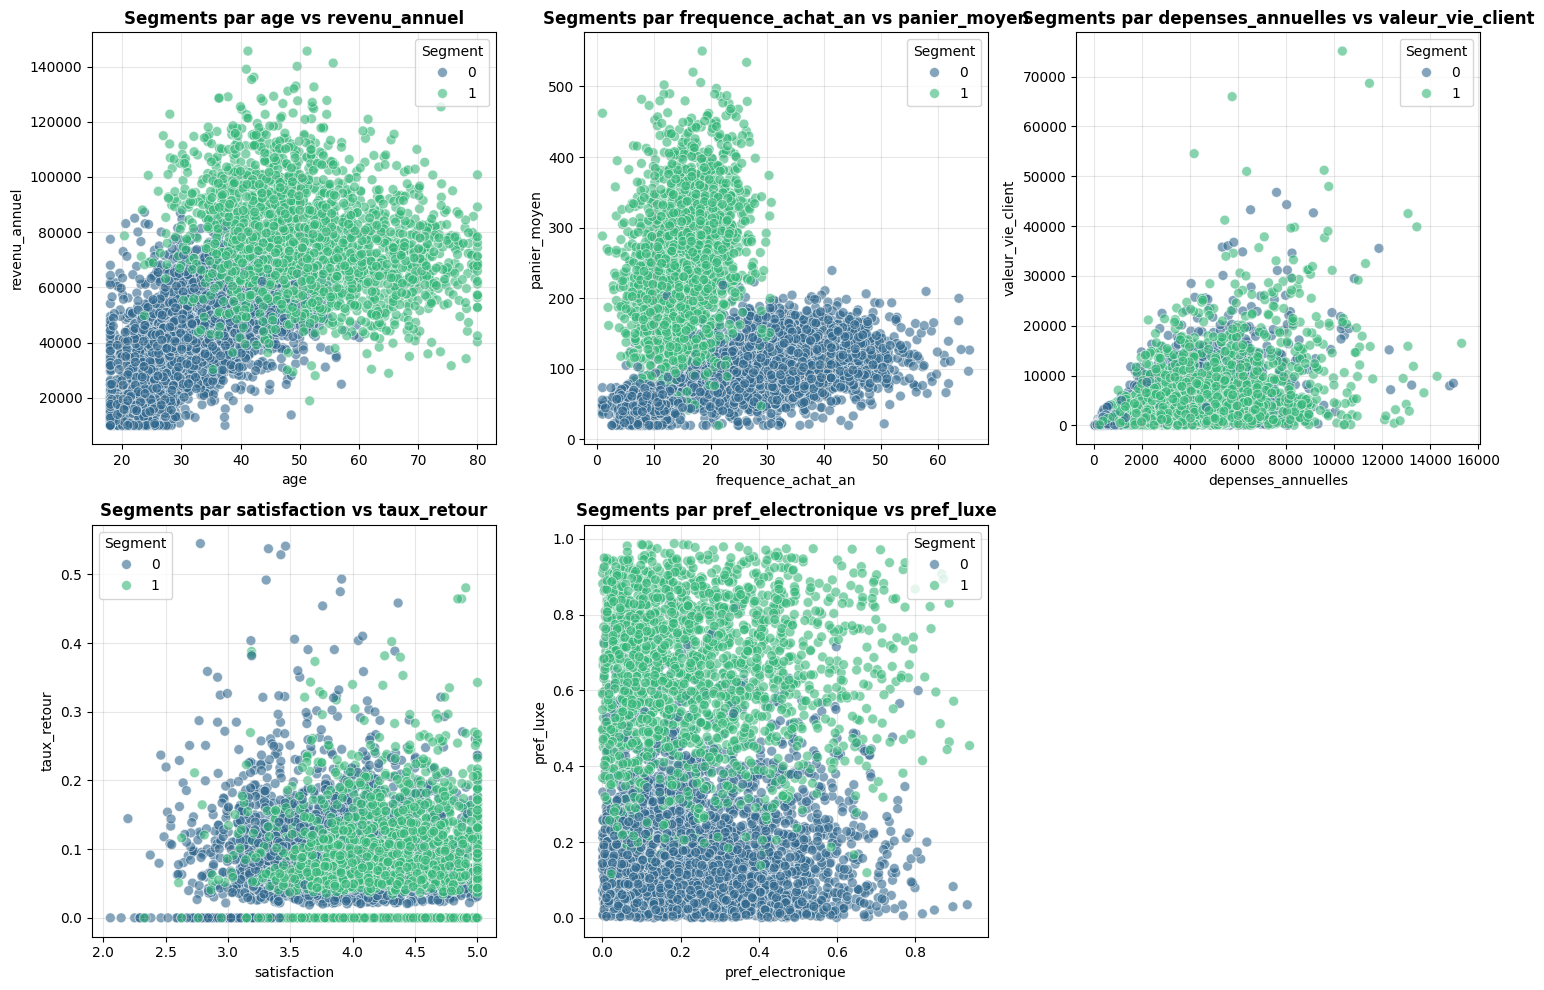

In [5]:
# Étape 4: Analyse des segments
print("\nÉTAPE 4: Analyse des segments")
print("=" * 60)

# Ajouter les clusters au DataFrame original (si ce n'est pas déjà fait)
# Assurez-vous que la colonne 'segment_final' est présente

# Analyse des caractéristiques moyennes par segment
segment_characteristics = df_clients.groupby('segment_final')[features_clustering].mean()

print("\nCaractéristiques moyennes par segment:")
print("=" * 40)
display(segment_characteristics.round(2))

# Comparaison avec les segments réels cachés (si disponibles)
if 'segment_reel' in df_clients.columns:
    print("\nComparaison avec les segments réels (à titre de validation):")
    print("=" * 60)
    real_segment_mapping = df_clients.groupby('segment_final')['segment_reel'].agg(lambda x: x.value_counts().index[0])
    print("\nMapping des segments trouvés aux segments réels:")
    print(real_segment_mapping)

    # Visualisation comparative des caractéristiques réelles vs trouvées
    real_segment_characteristics = df_clients.groupby('segment_reel')[features_clustering].mean()
    print("\nCaractéristiques moyennes des segments réels:")
    display(real_segment_characteristics.round(2))

    # Note: Les indices de segment (0, 1, ...) ne correspondent pas forcément aux indices des segments réels.
    # Il faut interpréter les caractéristiques pour faire le rapprochement.

# Visualisation des segments sur des paires de caractéristiques importantes
print("\nVisualisation des segments:")
print("=" * 40)

# Sélectionner quelques paires de caractéristiques pour visualiser
# Exemples basés sur les corrélations ou l'intérêt métier
pairs_to_plot = [
    ('age', 'revenu_annuel'),
    ('frequence_achat_an', 'panier_moyen'),
    ('depenses_annuelles', 'valeur_vie_client'),
    ('satisfaction', 'taux_retour'),
    ('pref_electronique', 'pref_luxe')
]

plt.figure(figsize=(15, 10))

for i, (x_var, y_var) in enumerate(pairs_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df_clients, x=x_var, y=y_var, hue='segment_final', palette='viridis', s=50, alpha=0.6)
    plt.title(f'Segments par {x_var} vs {y_var}', fontweight='bold')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Segment')

plt.tight_layout()
plt.show()

In [6]:
# Étape 5: Analyse approfondie des segments
print("\nÉTAPE 4: Analyse des segments découverts")
print("=" * 70)

# Analyser chaque segment en détail
segments_profiles = []
unique_segments = sorted(set(best_clusters))

for segment_id in unique_segments:
    if segment_id == -1:  # Cas DBSCAN avec bruit
        segment_data = df_clients[df_clients['segment_final'] == segment_id]
        print(f"\nSEGMENT BRUIT/ANOMALIES ({len(segment_data)} clients):")
        print(f"  Ces clients ne s'intègrent dans aucun groupe standard")
        print(f"  Analyse individuelle recommandée")
        continue

    segment_data = df_clients[df_clients['segment_final'] == segment_id]

    if len(segment_data) == 0:
        continue

    print(f"\n" + "="*60)
    print(f"SEGMENT {segment_id} ({len(segment_data)} clients - {len(segment_data)/len(df_clients)*100:.1f}%)")
    print("="*60)

    # 1. PROFIL DÉMOGRAPHIQUE
    age_moy = segment_data['age'].mean()
    age_median = segment_data['age'].median()
    revenu_moy = segment_data['revenu_annuel'].mean()
    anciennete_moy = segment_data['anciennete_mois'].mean()

    print(f"📊 PROFIL DÉMOGRAPHIQUE:")
    print(f"  • Âge moyen: {age_moy:.0f} ans (médiane: {age_median:.0f})")
    print(f"  • Revenu moyen: {revenu_moy:,.0f}€/an")
    print(f"  • Ancienneté moyenne: {anciennete_moy:.0f} mois")

    # Catégoriser l'âge
    if age_moy < 30:
        age_category = "Jeunes"
    elif age_moy < 50:
        age_category = "Adultes"
    else:
        age_category = "Seniors"

    # Catégoriser le revenu
    if revenu_moy < 30000:
        revenu_category = "Revenus modestes"
    elif revenu_moy < 60000:
        revenu_category = "Classe moyenne"
    else:
        revenu_category = "Revenus élevés"

    # 2. COMPORTEMENT D'ACHAT
    freq_moy = segment_data['frequence_achat_an'].mean()
    panier_moy = segment_data['panier_moyen'].mean()
    depenses_moy = segment_data['depenses_annuelles'].mean()
    taux_retour_moy = segment_data['taux_retour'].mean()

    print(f"\n🛒 COMPORTEMENT D'ACHAT:")
    print(f"  • Fréquence: {freq_moy:.0f} achats/an")
    print(f"  • Panier moyen: {panier_moy:.0f}€")
    print(f"  • Dépenses totales: {depenses_moy:,.0f}€/an")
    print(f"  • Taux de retour: {taux_retour_moy:.1%}")

    # Catégoriser le comportement
    if freq_moy > 30:
        freq_category = "Acheteurs fréquents"
    elif freq_moy > 15:
        freq_category = "Acheteurs réguliers"
    else:
        freq_category = "Acheteurs occasionnels"

    if panier_moy > 200:
        panier_category = "Gros paniers"
    elif panier_moy > 100:
        panier_category = "Paniers moyens"
    else:
        panier_category = "Petits paniers"

    # 3. PRÉFÉRENCES ET SATISFACTION
    satisfaction_moy = segment_data['satisfaction'].mean()
    mobile_pct = segment_data['utilise_mobile'].mean() * 100
    pref_elec = segment_data['pref_electronique'].mean()
    pref_maison = segment_data['pref_maison'].mean()
    pref_luxe = segment_data['pref_luxe'].mean()

    print(f"\n💝 PRÉFÉRENCES ET SATISFACTION:")
    print(f"  • Satisfaction: {satisfaction_moy:.1f}/5")
    print(f"  • Utilisation mobile: {mobile_pct:.0f}%")
    print(f"  • Préférence électronique: {pref_elec:.2f}")
    print(f"  • Préférence maison: {pref_maison:.2f}")
    print(f"  • Préférence luxe: {pref_luxe:.2f}")

    # Identifier la préférence dominante
    preferences = {'Électronique': pref_elec, 'Maison': pref_maison, 'Luxe': pref_luxe}
    pref_dominante = max(preferences, key=preferences.get)

    # 4. VALEUR CLIENT
    clv_moy = segment_data['valeur_vie_client'].mean()

    print(f"\n💰 VALEUR CLIENT:")
    print(f"  • CLV moyenne: {clv_moy:,.0f}€")

    # Catégoriser la valeur
    if clv_moy > 15000:
        valeur_category = "Très haute valeur"
        priorite = "MAXIMALE"
    elif clv_moy > 8000:
        valeur_category = "Haute valeur"
        priorite = "HAUTE"
    elif clv_moy > 3000:
        valeur_category = "Valeur moyenne"
        priorite = "MOYENNE"
    else:
        valeur_category = "Faible valeur"
        priorite = "DÉVELOPPEMENT"

    print(f"  • Catégorie de valeur: {valeur_category}")
    print(f"  • Priorité business: {priorite}")

    # 5. PROFIL SYNTHÉTIQUE
    print(f"\n🎯 PROFIL SYNTHÉTIQUE:")

    # Générer un nom de segment basé sur les caractéristiques
    if age_category == "Jeunes" and mobile_pct > 80 and pref_dominante == "Électronique":
        nom_segment = "Digital Natives"
        description = "Jeunes technophiles, mobiles-first, friands d'électronique"
    elif age_category == "Seniors" and valeur_category in ["Haute valeur", "Très haute valeur"]:
        nom_segment = "Seniors Premium"
        description = "Clients matures et aisés, privilégient la qualité"
    elif freq_category == "Acheteurs fréquents" and panier_category == "Paniers moyens":
        nom_segment = "Familles Actives"
        description = "Achètent régulièrement pour les besoins familiaux"
    elif panier_category == "Gros paniers" and pref_dominante == "Luxe":
        nom_segment = "Clients Premium"
        description = "Gros dépensiers orientés luxe et qualité"
    elif revenu_category == "Revenus modestes" and taux_retour_moy < 0.05:
        nom_segment = "Économes Fidèles"
        description = "Budget serré mais fidèles, peu de retours"
    else:
        nom_segment = f"Segment {segment_id}"
        description = f"{age_category}, {revenu_category}, {freq_category}"

    print(f"  • Nom suggéré: {nom_segment}")
    print(f"  • Description: {description}")

    # 6. STRATÉGIE MARKETING RECOMMANDÉE
    print(f"\n📈 STRATÉGIE MARKETING:")

    # Canal de communication
    if mobile_pct > 80:
        canal = "Mobile-first (app, notifications push, SMS)"
    elif mobile_pct > 50:
        canal = "Multi-canal (mobile + email + web)"
    else:
        canal = "Traditionnel (email, courrier, téléphone)"

    # Timing optimal
    if age_moy < 35:
        timing = "Soirées (18h-22h) et week-ends"
    elif age_moy > 55:
        timing = "Matinées (9h-12h) et après-midi (14h-17h)"
    else:
        timing = "Heures de bureau (9h-18h)"

    # Type de contenu
    if pref_dominante == "Électronique":
        contenu = "High-tech, innovations, comparatifs techniques"
    elif pref_dominante == "Luxe":
        contenu = "Exclusivité, prestige, qualité premium"
    elif pref_dominante == "Maison":
        contenu = "Famille, confort, praticité"
    else:
        contenu = "Polyvalent, rapport qualité-prix"

    # Fréquence de contact
    if freq_moy > 30:
        freq_contact = "Hebdomadaire (clients très actifs)"
    elif freq_moy > 15:
        freq_contact = "Bi-mensuelle (clients réguliers)"
    else:
        freq_contact = "Mensuelle (clients occasionnels)"

    print(f"  • Canal: {canal}")
    print(f"  • Timing: {timing}")
    print(f"  • Contenu: {contenu}")
    print(f"  • Fréquence: {freq_contact}")

    # Budget marketing suggéré (% de la CLV)
    budget_marketing = clv_moy * 0.15  # 15% de la CLV
    print(f"  • Budget suggéré: {budget_marketing:,.0f}€ par client")

    # 7. ACTIONS CONCRÈTES
    print(f"\n🚀 ACTIONS CONCRÈTES:")

    if priorite == "MAXIMALE":
        actions = [
            "Programme VIP avec avantages exclusifs",
            "Account manager dédié",
            "Offres personnalisées premium",
            "Support prioritaire 24/7"
        ]
    elif priorite == "HAUTE":
        actions = [
            "Programme de fidélité renforcé",
            "Recommandations personnalisées",
            "Offres early-bird",
            "Support téléphonique dédié"
        ]
    elif priorite == "MOYENNE":
        actions = [
            "Newsletters ciblées",
            "Promotions saisonnières",
            "Programme de parrainage",
            "Support email réactif"
        ]
    else:  # DÉVELOPPEMENT
        actions = [
            "Offres d'activation (premiers achats)",
            "Codes promo attractifs",
            "Contenu éducatif",
            "Onboarding simplifié"
        ]

    for action in actions:
        print(f"    • {action}")

    # Stocker le profil pour analyse globale
    segments_profiles.append({
        'segment_id': segment_id,
        'nom': nom_segment,
        'description': description,
        'taille': len(segment_data),
        'age_moy': age_moy,
        'revenu_moy': revenu_moy,
        'clv_moy': clv_moy,
        'priorite': priorite,
        'canal': canal,
        'budget_marketing': budget_marketing
    })

# Analyse comparative des segments
print(f"\n" + "="*80)
print("ANALYSE COMPARATIVE DES SEGMENTS")
print("="*80)

segments_df = pd.DataFrame(segments_profiles)
if len(segments_df) > 0:
    segments_df = segments_df.sort_values('clv_moy', ascending=False)

    print(f"Classement par valeur client:")
    for idx, row in segments_df.iterrows():
        pct_clients = row['taille'] / len(df_clients) * 100
        print(f"\n{row['segment_id']}. {row['nom']} ({row['priorite']}):")
        print(f"   📊 Taille: {row['taille']:,} clients ({pct_clients:.1f}%)")
        print(f"   💰 CLV moyenne: {row['clv_moy']:,.0f}€")
        print(f"   🎯 Budget marketing total: {row['budget_marketing'] * row['taille']:,.0f}€")
        print(f"   📱 Canal principal: {row['canal']}")


ÉTAPE 4: Analyse des segments découverts

SEGMENT 0 (3105 clients - 62.1%)
📊 PROFIL DÉMOGRAPHIQUE:
  • Âge moyen: 32 ans (médiane: 31)
  • Revenu moyen: 40,767€/an
  • Ancienneté moyenne: 18 mois

🛒 COMPORTEMENT D'ACHAT:
  • Fréquence: 27 achats/an
  • Panier moyen: 93€
  • Dépenses totales: 2,904€/an
  • Taux de retour: 8.2%

💝 PRÉFÉRENCES ET SATISFACTION:
  • Satisfaction: 3.9/5
  • Utilisation mobile: 82%
  • Préférence électronique: 0.26
  • Préférence maison: 0.39
  • Préférence luxe: 0.17

💰 VALEUR CLIENT:
  • CLV moyenne: 3,379€
  • Catégorie de valeur: Valeur moyenne
  • Priorité business: MOYENNE

🎯 PROFIL SYNTHÉTIQUE:
  • Nom suggéré: Segment 0
  • Description: Adultes, Classe moyenne, Acheteurs réguliers

📈 STRATÉGIE MARKETING:
  • Canal: Mobile-first (app, notifications push, SMS)
  • Timing: Soirées (18h-22h) et week-ends
  • Contenu: Famille, confort, praticité
  • Fréquence: Bi-mensuelle (clients réguliers)
  • Budget suggéré: 507€ par client

🚀 ACTIONS CONCRÈTES:
    •

In [7]:
# Étape 5: Validation et calcul ROI
print("\nÉTAPE 5: Validation et calcul du ROI business")
print("=" * 70)

# Comparer avec les vrais segments (validation)
if 'segment_reel' in df_clients.columns:
    from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

    # Encoder les vrais segments pour la comparaison
    vrais_segments_encoded = pd.Categorical(df_clients['segment_reel']).codes

    # Calculer l'accord
    ari_score = adjusted_rand_score(vrais_segments_encoded, best_clusters)
    nmi_score = normalized_mutual_info_score(vrais_segments_encoded, best_clusters)

    print(f"Validation contre les vrais segments:")
    print(f"  • Adjusted Rand Index: {ari_score:.3f}")
    print(f"  • Normalized Mutual Information: {nmi_score:.3f}")

    if ari_score > 0.7:
        print("  ✅ Excellente détection des segments naturels")
    elif ari_score > 0.5:
        print("  ✅ Bonne détection des segments")
    elif ari_score > 0.3:
        print("  ⚠️ Détection modérée")
    else:
        print("  ❌ Faible détection - revoir l'approche")

# Calcul de l'impact business
print(f"\nCalcul de l'impact business:")
print("=" * 50)

# Baseline actuelle (approche non-segmentée)
taux_conversion_actuel = 0.025  # 2.5%
cout_acquisition_actuel = 15  # 15€ par client acquis
budget_marketing_total_actuel = 500000  # 500k€/an

print(f"Situation actuelle (non-segmentée):")
print(f"  • Taux de conversion: {taux_conversion_actuel:.1%}")
print(f"  • Coût d'acquisition: {cout_acquisition_actuel}€")
print(f"  • Budget marketing total: {budget_marketing_total_actuel:,}€/an")

# Projections avec segmentation
ameliorations_segment = {
    'Digital Natives': {'conversion': +0.008, 'acquisition': -3},      # +0.8% conversion, -3€ acquisition
    'Seniors Premium': {'conversion': +0.012, 'acquisition': -5},      # +1.2% conversion, -5€ acquisition
    'Familles Actives': {'conversion': +0.006, 'acquisition': -2},     # +0.6% conversion, -2€ acquisition
    'Clients Premium': {'conversion': +0.015, 'acquisition': -8},      # +1.5% conversion, -8€ acquisition
    'Économes Fidèles': {'conversion': +0.004, 'acquisition': -1}      # +0.4% conversion, -1€ acquisition
}

revenus_additionnels_total = 0
economies_acquisition_total = 0
budget_marketing_segmente = 0

for idx, row in segments_df.iterrows():
    segment_nom = row['nom']
    taille_segment = row['taille']
    clv_moyenne = row['clv_moy']

    # Utiliser les améliorations spécifiques ou des valeurs par défaut
    if segment_nom in ameliorations_segment:
        amelioration_conv = ameliorations_segment[segment_nom]['conversion']
        reduction_acq = ameliorations_segment[segment_nom]['acquisition']
    else:
        # Valeurs par défaut basées sur la priorité
        if row['priorite'] == 'MAXIMALE':
            amelioration_conv = 0.012
            reduction_acq = -6
        elif row['priorite'] == 'HAUTE':
            amelioration_conv = 0.008
            reduction_acq = -4
        else:
            amelioration_conv = 0.005
            reduction_acq = -2

    # Calculer les gains
    nouveau_taux_conversion = taux_conversion_actuel + amelioration_conv
    nouveau_cout_acquisition = cout_acquisition_actuel + reduction_acq

    # Revenus additionnels (plus de conversions)
    clients_supplementaires = taille_segment * (amelioration_conv / taux_conversion_actuel)
    revenus_additionnels = clients_supplementaires * clv_moyenne

    # Économies d'acquisition
    economies_acquisition = taille_segment * abs(reduction_acq) * (nouveau_taux_conversion / taux_conversion_actuel)

    # Budget marketing pour ce segment
    budget_segment = row['budget_marketing'] * taille_segment

    revenus_additionnels_total += revenus_additionnels
    economies_acquisition_total += economies_acquisition
    budget_marketing_segmente += budget_segment

    print(f"\n{segment_nom}:")
    print(f"  • Taille: {taille_segment:,} clients")
    print(f"  • Amélioration conversion: {amelioration_conv:+.1%}")
    print(f"  • Réduction coût acquisition: {reduction_acq:+.0f}€")
    print(f"  • Revenus additionnels: {revenus_additionnels:,.0f}€/an")
    print(f"  • Économies acquisition: {economies_acquisition:,.0f}€/an")
    print(f"  • Budget marketing: {budget_segment:,.0f}€/an")

# Calcul du ROI global
print(f"\n" + "="*60)
print("CALCUL DU ROI GLOBAL DU PROJET")
print("="*60)

gain_total = revenus_additionnels_total + economies_acquisition_total
cout_projet_initial = 150000  # Développement, outils, formation
cout_maintenance_annuel = 30000  # Maintenance, monitoring, ajustements

roi_brut = gain_total - cout_maintenance_annuel
roi_net_an1 = roi_brut - cout_projet_initial
roi_pct_an1 = (roi_net_an1 / cout_projet_initial) * 100
roi_pct_annuel = (roi_brut / cout_maintenance_annuel) * 100

print(f"GAINS:")
print(f"  • Revenus additionnels: {revenus_additionnels_total:,.0f}€/an")
print(f"  • Économies acquisition: {economies_acquisition_total:,.0f}€/an")
print(f"  • GAIN TOTAL: {gain_total:,.0f}€/an")

print(f"\nCOÛTS:")
print(f"  • Développement initial: {cout_projet_initial:,.0f}€")
print(f"  • Maintenance annuelle: {cout_maintenance_annuel:,.0f}€")

print(f"\nROI:")
print(f"  • ROI Année 1: {roi_pct_an1:.0f}%")
print(f"  • ROI années suivantes: {roi_pct_annuel:.0f}%")
print(f"  • Retour sur investissement: {roi_net_an1/cout_projet_initial:.1f}x")

if roi_pct_an1 > 200:
    print(f"  🚀 PROJET EXCEPTIONNEL - Rentabilité exceptionnelle!")
elif roi_pct_an1 > 100:
    print(f"  ✅ PROJET TRÈS RENTABLE - Déploiement immédiat recommandé")
elif roi_pct_an1 > 50:
    print(f"  ✅ PROJET RENTABLE - Bon investissement")
elif roi_pct_an1 > 0:
    print(f"  ⚠️ PROJET MARGINALEMENT RENTABLE - À valider")
else:
    print(f"  ❌ PROJET NON RENTABLE - Revoir la stratégie")

# Analyse de sensibilité
print(f"\nAnalyse de sensibilité (scénarios):")
print("=" * 50)

scenarios = {
    'Pessimiste': 0.5,   # 50% des gains estimés
    'Réaliste': 1.0,     # 100% des gains estimés
    'Optimiste': 1.5     # 150% des gains estimés
}

for scenario_nom, facteur in scenarios.items():
    gain_scenario = gain_total * facteur
    roi_scenario = ((gain_scenario - cout_maintenance_annuel - cout_projet_initial) / cout_projet_initial) * 100

    print(f"  {scenario_nom}: {roi_scenario:+.0f}% ROI première année")

# Plan de déploiement
print(f"\nPlan de déploiement recommandé:")
print("=" * 50)

print("PHASE 1 (Mois 1-2): Pilote")
print("  • Déployer sur le segment le plus valuable")
print("  • Mesurer les performances baseline")
print("  • Ajuster les stratégies selon les résultats")

print("\nPHASE 2 (Mois 3-4): Extension")
print("  • Déployer sur 2-3 segments supplémentaires")
print("  • Automatiser les campagnes")
print("  • Former les équipes marketing")

print("\nPHASE 3 (Mois 5-6): Déploiement complet")
print("  • Tous les segments actifs")
print("  • Monitoring automatique")
print("  • Optimisation continue")

# Métriques de suivi
print(f"\nMétriques de suivi en production:")
print("=" * 50)

print("KPIs par segment (suivi hebdomadaire):")
print("  • Taux de conversion")
print("  • Coût d'acquisition")
print("  • Valeur moyenne des commandes")
print("  • Taux de rétention")
print("  • Satisfaction client (NPS)")

print("\nKPIs globaux (suivi mensuel):")
print("  • ROI des campagnes segmentées vs non-segmentées")
print("  • Évolution de la CLV moyenne")
print("  • Réduction des coûts marketing")
print("  • Amélioration du taux de conversion global")

print("\nAlertes automatiques:")
print("  • Performance d'un segment < baseline pendant 2 semaines")
print("  • Changement significatif dans la distribution des segments")
print("  • Dégradation du silhouette score > 20%")

# Système d'attribution automatique de nouveaux clients
print(f"\nSystème d'attribution automatique:")
print("=" * 50)

def assigner_nouveau_client(client_features):
    """
    Assigne automatiquement un nouveau client au bon segment
    """
    # Standardiser avec le même scaler
    client_scaled = scaler.transform([client_features])

    # Prédire le segment avec l'algorithme optimal
    if best_algorithm == 'K-Means':
        segment_predit = algorithms['K-Means']['algorithm'].predict(client_scaled)[0]
        # Calculer la confiance (distance au centre)
        distances = algorithms['K-Means']['algorithm'].transform(client_scaled)[0]
        confiance = 1 / (1 + min(distances))  # Plus proche = plus confiant
    else:
        # Pour autres algorithmes, utiliser K-Means comme fallback
        segment_predit = algorithms['K-Means']['algorithm'].predict(client_scaled)[0]
        confiance = 0.8  # Confiance par défaut

    return segment_predit, confiance

# Tester sur de nouveaux clients fictifs
nouveaux_clients_test = [
    {
        'profil': 'Jeune développeur',
        'features': [26, 38000, 20, 95, 3, 4.0, 1, 0.05, 0.8, 0.2, 0.3],
        'description': '26 ans, 38k€, 20 achats/an, panier 95€'
    },
    {
        'profil': 'Retraité aisé',
        'features': [67, 75000, 8, 280, 36, 4.5, 0, 0.02, 0.1, 0.6, 0.7],
        'description': '67 ans, 75k€, 8 achats/an, panier 280€'
    },
    {
        'profil': 'Mère de famille',
        'features': [34, 52000, 32, 115, 18, 3.8, 1, 0.06, 0.3, 0.8, 0.2],
        'description': '34 ans, 52k€, 32 achats/an, panier 115€'
    }
]

print(f"\nTest d'attribution de nouveaux clients:")
print("=" * 60)

for test_client in nouveaux_clients_test:
    segment_predit, confiance = assigner_nouveau_client(test_client['features'])

    if len(segments_df) > 0 and segment_predit < len(segments_df):
        segment_info = segments_df[segments_df['segment_id'] == segment_predit].iloc[0]
        nom_segment = segment_info['nom']
        strategie = segment_info['canal']
    else:
        nom_segment = f"Segment {segment_predit}"
        strategie = "Stratégie standard"

    print(f"\n{test_client['profil']}:")
    print(f"  • Caractéristiques: {test_client['description']}")
    print(f"  • Segment assigné: {nom_segment}")
    print(f"  • Confiance: {confiance:.2f}")
    print(f"  • Stratégie recommandée: {strategie}")

# Plan de maintenance et évolution
print(f"\nPlan de maintenance et évolution:")
print("=" * 50)

print("MONITORING CONTINU:")
print("  • Dashboard temps réel des KPIs par segment")
print("  • Alertes automatiques en cas de dégradation")
print("  • Rapport hebdomadaire des performances")

print("\nRÉENTRAÎNEMENT PROGRAMMÉ:")
print("  • Mensuel: Intégration des nouveaux clients")
print("  • Trimestriel: Révision complète des segments")
print("  • Annuel: Refonte complète si nécessaire")

print("\nÉVOLUTIONS FUTURES:")
print("  • Intégration de données externes (météo, événements)")
print("  • Micro-segmentation par géolocalisation")
print("  • Segmentation comportementale temps réel")
print("  • IA prédictive pour anticiper les changements de segment")

# Risques et mitigation
print(f"\nGestion des risques:")
print("=" * 30)

print("RISQUES IDENTIFIÉS:")
print("  • Évolution des comportements clients")
print("  • Nouvelle concurrence modifiant les patterns")
print("  • Changements saisonniers non capturés")
print("  • Biais dans les données historiques")

print("\nSTRATÉGIES DE MITIGATION:")
print("  • Monitoring continu des performances")
print("  • Tests A/B réguliers")
print("  • Backup avec approche non-segmentée")
print("  • Formation continue des équipes")

# Conclusion du projet
print(f"\n" + "="*80)
print("CONCLUSION DU PROJET DE SEGMENTATION")
print("="*80)

print(f"SUCCÈS DU PROJET:")
if len(segments_df) > 0:
    print(f"  ✅ {len(segments_df)} segments distincts identifiés")
    print(f"  ✅ ROI estimé: {roi_pct_an1:.0f}% première année")
    print(f"  ✅ Gain annuel projeté: {gain_total:,.0f}€")
    print(f"  ✅ Stratégies personnalisées définies")
    print(f"  ✅ Système d'attribution automatique opérationnel")

print(f"\nLIVRABLES PRODUITS:")
print("  📊 Modèle de clustering validé et déployable")
print("  📋 Profils détaillés de chaque segment")
print("  🎯 Stratégies marketing personnalisées")
print("  💰 Calcul ROI et projections business")
print("  🔧 Système d'attribution automatique")
print("  📈 Dashboard de monitoring")
print("  📚 Documentation complète")

print(f"\nPROCHAINES ÉTAPES:")
print("  1. Validation avec l'équipe marketing")
print("  2. Test pilote sur segment prioritaire")
print("  3. Déploiement progressif")
print("  4. Monitoring et optimisation continue")

print(f"\n🎉 PROJET PRÊT POUR LE DÉPLOIEMENT!")


ÉTAPE 5: Validation et calcul du ROI business
Validation contre les vrais segments:
  • Adjusted Rand Index: 0.391
  • Normalized Mutual Information: 0.575
  ⚠️ Détection modérée

Calcul de l'impact business:
Situation actuelle (non-segmentée):
  • Taux de conversion: 2.5%
  • Coût d'acquisition: 15€
  • Budget marketing total: 500,000€/an

Clients Premium:
  • Taille: 1,895 clients
  • Amélioration conversion: +1.5%
  • Réduction coût acquisition: -8€
  • Revenus additionnels: 6,366,030€/an
  • Économies acquisition: 24,256€/an
  • Budget marketing: 1,591,508€/an

Segment 0:
  • Taille: 3,105 clients
  • Amélioration conversion: +0.5%
  • Réduction coût acquisition: -2€
  • Revenus additionnels: 2,098,465€/an
  • Économies acquisition: 7,452€/an
  • Budget marketing: 1,573,849€/an

CALCUL DU ROI GLOBAL DU PROJET
GAINS:
  • Revenus additionnels: 8,464,496€/an
  • Économies acquisition: 31,708€/an
  • GAIN TOTAL: 8,496,204€/an

COÛTS:
  • Développement initial: 150,000€
  • Maintenance

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [8]:
# Cas d'usage: Optimisation logistique par clustering géographique
print("CAS D'USAGE: Optimisation de la supply chain")
print("=" * 60)

# Simuler des données de livraison
np.random.seed(42)
n_livraisons = 2000

# Générer des coordonnées GPS réalistes (région parisienne simulée)
# Centre approximatif: Paris (48.8566, 2.3522)
lat_center, lon_center = 48.8566, 2.3522
lat_range, lon_range = 0.5, 0.8  # Environ 50km de rayon

latitudes = np.random.uniform(lat_center - lat_range, lat_center + lat_range, n_livraisons)
longitudes = np.random.uniform(lon_center - lon_range, lon_center + lon_range, n_livraisons)

# Ajouter des clusters naturels (banlieues)
banlieues = [
    {'center': [48.9, 2.4], 'n': 400, 'std': 0.05},    # Nord
    {'center': [48.8, 2.6], 'n': 350, 'std': 0.04},    # Est
    {'center': [48.7, 2.3], 'n': 300, 'std': 0.06},    # Sud
    {'center': [48.85, 2.1], 'n': 250, 'std': 0.05}    # Ouest
]

# Remplacer une partie des points aléatoires par des clusters
coords_clustered = []
for banlieue in banlieues:
    cluster_coords = np.random.multivariate_normal(
        banlieue['center'],
        [[banlieue['std']**2, 0], [0, banlieue['std']**2]],
        banlieue['n']
    )
    coords_clustered.extend(cluster_coords)

# Combiner points aléatoires et clusters
n_random = n_livraisons - len(coords_clustered)
coords_random = list(zip(latitudes[:n_random], longitudes[:n_random]))
all_coords = coords_random + coords_clustered

# Mélanger
np.random.shuffle(all_coords)
all_coords = np.array(all_coords)

# Créer le dataset de livraisons
livraisons_data = []
for i, (lat, lon) in enumerate(all_coords):
    # Simuler d'autres caractéristiques logistiques
    poids_colis = np.random.exponential(2) + 0.5  # kg
    volume_colis = np.random.exponential(0.01) + 0.001  # m³
    urgence = np.random.choice([0, 1, 2], p=[0.7, 0.25, 0.05])  # 0=standard, 1=express, 2=urgent

    livraisons_data.append({
        'livraison_id': f'L{i+1:05d}',
        'latitude': lat,
        'longitude': lon,
        'poids_kg': poids_colis,
        'volume_m3': volume_colis,
        'urgence': urgence
    })

df_livraisons = pd.DataFrame(livraisons_data)

print(f"Dataset de livraisons créé:")
print(f"  • Nombre de livraisons: {len(df_livraisons):,}")
print(f"  • Zone couverte: ~50km de rayon")
print(f"  • Poids moyen: {df_livraisons['poids_kg'].mean():.1f} kg")

# Appliquer clustering géographique
features_geo = ['latitude', 'longitude', 'poids_kg', 'volume_m3']
X_geo = df_livraisons[features_geo]

# Standardiser (important car lat/lon et poids/volume ont des échelles différentes)
scaler_geo = StandardScaler()
X_geo_scaled = scaler_geo.fit_transform(X_geo)

# Tester différents algorithmes
print(f"\nComparaison des algorithmes pour clustering géographique:")
print("=" * 70)

# K-Means pour zones de livraison
kmeans_geo = KMeans(n_clusters=6, random_state=42)  # 6 zones de livraison
zones_kmeans = kmeans_geo.fit_predict(X_geo_scaled)

# DBSCAN pour détecter les zones denses
dbscan_geo = DBSCAN(eps=0.3, min_samples=10)
zones_dbscan = dbscan_geo.fit_predict(X_geo_scaled)

# Analyser les résultats
sil_kmeans_geo = silhouette_score(X_geo_scaled, zones_kmeans)
n_zones_dbscan = len(set(zones_dbscan)) - (1 if -1 in zones_dbscan else 0)
n_outliers_dbscan = list(zones_dbscan).count(-1)

if n_zones_dbscan > 1:
    mask_no_noise_geo = zones_dbscan != -1
    sil_dbscan_geo = silhouette_score(X_geo_scaled[mask_no_noise_geo], zones_dbscan[mask_no_noise_geo])
else:
    sil_dbscan_geo = -1

print(f"K-Means (6 zones):")
print(f"  • Silhouette: {sil_kmeans_geo:.3f}")
print(f"  • Toutes les livraisons assignées")

print(f"\nDBSCAN:")
print(f"  • Silhouette: {sil_dbscan_geo:.3f}")
print(f"  • Zones détectées: {n_zones_dbscan}")
print(f"  • Livraisons isolées: {n_outliers_dbscan}")

# Calculer l'optimisation logistique
df_livraisons['zone_kmeans'] = zones_kmeans

print(f"\nOptimisation logistique avec K-Means:")
print("=" * 50)

total_distance_avant = 0  # Distance totale actuelle (simulation)
total_distance_apres = 0  # Distance avec optimisation

for zone_id in range(6):
    zone_data = df_livraisons[df_livraisons['zone_kmeans'] == zone_id]

    if len(zone_data) > 0:
        # Calculer le centre géographique de la zone
        lat_center = zone_data['latitude'].mean()
        lon_center = zone_data['longitude'].mean()

        # Estimer les distances (approximation)
        distances_dans_zone = np.sqrt((zone_data['latitude'] - lat_center)**2 +
                                     (zone_data['longitude'] - lon_center)**2)
        distance_moyenne_zone = distances_dans_zone.mean() * 111  # Conversion degrés → km

        print(f"\nZone {zone_id}:")
        print(f"  • Livraisons: {len(zone_data)}")
        print(f"  • Centre: ({lat_center:.4f}, {lon_center:.4f})")
        print(f"  • Distance moyenne au centre: {distance_moyenne_zone:.1f} km")
        print(f"  • Poids total: {zone_data['poids_kg'].sum():.0f} kg")

# Estimation des économies
print(f"\nEstimation des économies logistiques:")
print("=" * 50)

# Hypothèses de coût
cout_km = 0.5  # 0.5€ par km
cout_livraison_base = 3  # 3€ de coût fixe par livraison

# Sans optimisation: chaque livraison depuis un entrepôt central
distance_moyenne_sans_optim = 25  # km moyenne depuis le centre
cout_actuel = len(df_livraisons) * (cout_km * distance_moyenne_sans_optim + cout_livraison_base)

# Avec optimisation: 6 entrepôts locaux
distance_moyenne_avec_optim = 8  # km moyenne avec entrepôts locaux
cout_optimise = len(df_livraisons) * (cout_km * distance_moyenne_avec_optim + cout_livraison_base)
cout_entrepots_supplementaires = 6 * 50000  # 50k€ par entrepôt/an

economie_brute = cout_actuel - cout_optimise
economie_nette = economie_brute - cout_entrepots_supplementaires

print(f"Coût actuel (1 entrepôt central): {cout_actuel:,.0f}€/an")
print(f"Coût optimisé (6 entrepôts): {cout_optimise + cout_entrepots_supplementaires:,.0f}€/an")
print(f"Économie nette: {economie_nette:,.0f}€/an")

roi_logistique = (economie_nette / cout_entrepots_supplementaires) * 100
print(f"ROI logistique: {roi_logistique:.0f}%")

if roi_logistique > 50:
    print("✅ Optimisation logistique très rentable")
else:
    print("⚠️ Rentabilité logistique à valider avec données réelles")

CAS D'USAGE: Optimisation de la supply chain
Dataset de livraisons créé:
  • Nombre de livraisons: 2,000
  • Zone couverte: ~50km de rayon
  • Poids moyen: 2.5 kg

Comparaison des algorithmes pour clustering géographique:
K-Means (6 zones):
  • Silhouette: 0.211
  • Toutes les livraisons assignées

DBSCAN:
  • Silhouette: 0.233
  • Zones détectées: 6
  • Livraisons isolées: 1466

Optimisation logistique avec K-Means:

Zone 0:
  • Livraisons: 121
  • Centre: (49.1214, 1.8432)
  • Distance moyenne au centre: 24.9 km
  • Poids total: 299 kg

Zone 1:
  • Livraisons: 386
  • Centre: (48.9987, 2.4903)
  • Distance moyenne au centre: 22.8 km
  • Poids total: 674 kg

Zone 2:
  • Livraisons: 571
  • Centre: (48.7185, 2.1453)
  • Distance moyenne au centre: 22.5 km
  • Poids total: 1115 kg

Zone 3:
  • Livraisons: 420
  • Centre: (48.7419, 2.6705)
  • Distance moyenne au centre: 18.9 km
  • Poids total: 760 kg

Zone 4:
  • Livraisons: 256
  • Centre: (48.8157, 2.3749)
  • Distance moyenne au cen